Portal description : The objective of this portal is to make NASA data, including imagery, eminently accessible to application developers and data professionals. Before starting to use its APIs endpoints, it's mandatory that you generate your API KEY and store it somewhere for later use. The API key acts as the user identifier when requesting the API. To get your KEY, fill in the provided form with your personal information, and then we shall receive an email containing your personal API KEY.



 


Instructions

Go to the NASA API portal and generate your API KEY

Import the requests package and store your API KEY in variable

Go back to portal website and click on 'browse APIs'

Click on the first dropdown menu, named 'APOD' and read its documentation

Follow the provided documentation to ask the API endpoint for the astronomy picture of the day. Get then display the image on your notebook.

Go through the list of the provided API endpoints once again and select 'Astronomy Picture of the Day' option. Store the results in a pandas dataframe

Do the necessary data pre-processing tasks on the previous result in order to get a clean dataframe with the following columns :

Asteroid ID

Asteroid name

The Minimal estimated diameter in Kilometre

Absolute_magnitude

Relative_velocity(km/s)

Try to export the new dataframe into a CSV file and share it with your colleagues

In [1]:
import requests
import pandas as pd
from IPython.display import Image, display

# Astronomy Picture of the Day

In [2]:
api_key = 'rpd7hH0cmddYIaZ0F85zKDqSrOfEmtXJpLjncF4a'

In [3]:
response = requests.get("https://api.nasa.gov/planetary/apod?api_key=DEMO_KEY")

In [4]:
apod_data = response.json()

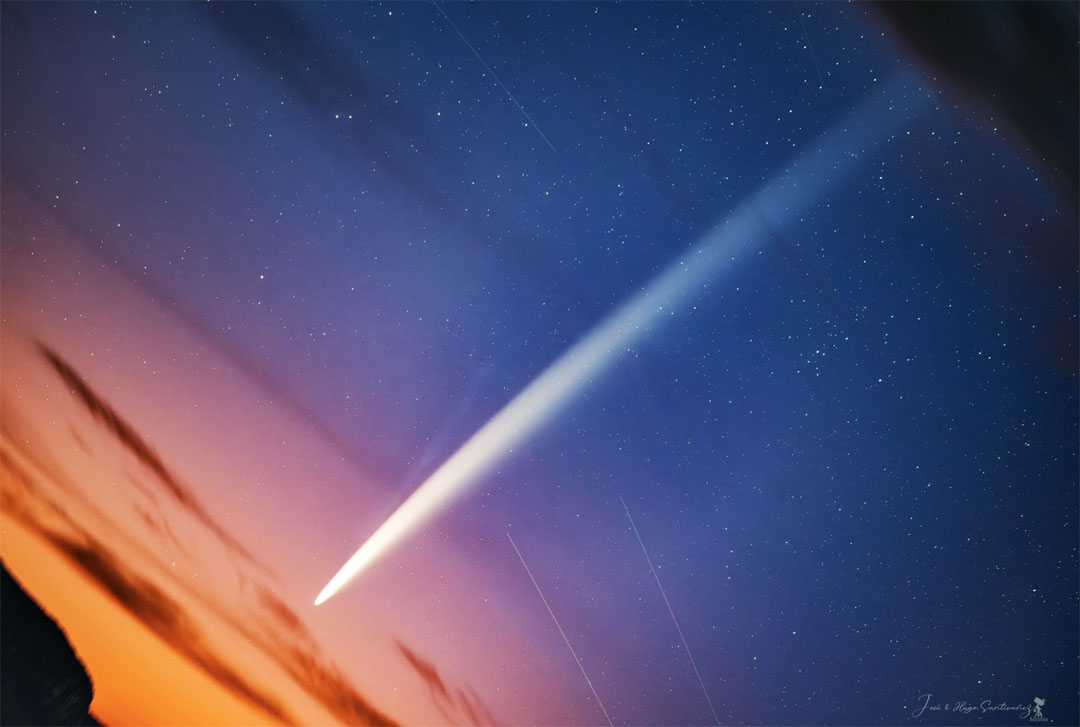

In [5]:
# Display the image
display(Image(apod_data['url']))

# Asteroid Data

In [12]:

neo_url = "https://api.nasa.gov/neo/rest/v1/neo/browse"

# Set up parameters with your API key
params = {'api_key': api_key}

# Fetch the asteroid data
neo_response = requests.get(neo_url, params=params)
neo_data = neo_response.json()




## Convert to dataframe

In [16]:
neo_data

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/neo/browse?page=1&size=20&api_key=rpd7hH0cmddYIaZ0F85zKDqSrOfEmtXJpLjncF4a',
  'self': 'http://api.nasa.gov/neo/rest/v1/neo/browse?page=0&size=20&api_key=rpd7hH0cmddYIaZ0F85zKDqSrOfEmtXJpLjncF4a'},
 'page': {'size': 20,
  'total_elements': 36891,
  'total_pages': 1845,
  'number': 0},
 'near_earth_objects': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2000433?api_key=rpd7hH0cmddYIaZ0F85zKDqSrOfEmtXJpLjncF4a'},
   'id': '2000433',
   'neo_reference_id': '2000433',
   'name': '433 Eros (A898 PA)',
   'name_limited': 'Eros',
   'designation': '433',
   'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2000433',
   'absolute_magnitude_h': 10.41,
   'estimated_diameter': {'kilometers': {'estimated_diameter_min': 22.0067027115,
     'estimated_diameter_max': 49.2084832235},
    'meters': {'estimated_diameter_min': 22006.7027114738,
     'estimated_diameter_max': 49208.4832234845},
    'miles': {'estimated_d

In [20]:
# instantiate an empty list to store the data
asteroid_data = []

for asteroid in asteroid_list:
    asteroid_id = asteroid['id']
    asteroid_name = asteroid['name']
    min_diameter_km = asteroid['estimated_diameter']['kilometers']['estimated_diameter_min']
    abs_magnitude = asteroid['absolute_magnitude_h']
    asteroid_data.append([asteroid_id, asteroid_name, min_diameter_km, abs_magnitude])

# Create a DataFrame with the required columns
df_asteroids = pd.DataFrame(asteroid_data, columns=['Asteroid ID', 'Asteroid Name', 'Minimal Estimated Diameter (km)', 'Absolute Magnitude'])
df_asteroids.head()


Asteroid ID           Asteroid Name  Minimal Estimated Diameter (km)  \
0     2000433      433 Eros (A898 PA)                        22.006703   
1     2000719    719 Albert (A911 TB)                         2.025606   
2     2000887    887 Alinda (A918 AA)                         4.451998   
3     2001036  1036 Ganymed (A924 UB)                        37.545248   
4     2001221    1221 Amor (1932 EA1)                         0.888290   

   Absolute Magnitude  
0               10.41  
1               15.59  
2               13.88  
3                9.25  
4               17.38

In [22]:
df_asteroids.isnull().sum()

Asteroid ID                        0
Asteroid Name                      0
Minimal Estimated Diameter (km)    0
Absolute Magnitude                 0
dtype: int64

In [24]:
# save to csv file
df_asteroids.to_csv("asteroid_dataset.scv")